In [5]:
import segyio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [4]:
import segypy

# Set verbose level
segypy.verbose=1;

filename='./data/3d_farstack.sgy'

# Get only SegyHeader
SH = segypy.getSegyHeader(filename);

SegyPY0.57:  getSegyHeader : succesfully read ./data/3d_nearstack.sgy


In [6]:
inl=np.arange(1300,1502,2)
crl=np.arange(1500,2002,2)
hrz=np.recfromtxt('./data/Top_Heimdal_subset.txt', names=['il','xl','z'])

filename='./data/3d_farstack.sgy'
#f=open(filename, 'rb')
seis,header,trace_headers=segypy.readSegy(filename)
near=seis.reshape(header['ns'],inl.size,crl.size)

lagtime=trace_headers['LagTimeA'][0]*-1
twt=np.arange(lagtime,header['dt']/1e3*header['ns']+lagtime,header['dt']/1e3)

SegyPY0.57:  readSegy : Trying to read ./data/3d_farstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ./data/3d_farstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data


In [7]:
print(twt.shape)
print(twt)

(250,)
[1500. 1504. 1508. 1512. 1516. 1520. 1524. 1528. 1532. 1536. 1540. 1544.
 1548. 1552. 1556. 1560. 1564. 1568. 1572. 1576. 1580. 1584. 1588. 1592.
 1596. 1600. 1604. 1608. 1612. 1616. 1620. 1624. 1628. 1632. 1636. 1640.
 1644. 1648. 1652. 1656. 1660. 1664. 1668. 1672. 1676. 1680. 1684. 1688.
 1692. 1696. 1700. 1704. 1708. 1712. 1716. 1720. 1724. 1728. 1732. 1736.
 1740. 1744. 1748. 1752. 1756. 1760. 1764. 1768. 1772. 1776. 1780. 1784.
 1788. 1792. 1796. 1800. 1804. 1808. 1812. 1816. 1820. 1824. 1828. 1832.
 1836. 1840. 1844. 1848. 1852. 1856. 1860. 1864. 1868. 1872. 1876. 1880.
 1884. 1888. 1892. 1896. 1900. 1904. 1908. 1912. 1916. 1920. 1924. 1928.
 1932. 1936. 1940. 1944. 1948. 1952. 1956. 1960. 1964. 1968. 1972. 1976.
 1980. 1984. 1988. 1992. 1996. 2000. 2004. 2008. 2012. 2016. 2020. 2024.
 2028. 2032. 2036. 2040. 2044. 2048. 2052. 2056. 2060. 2064. 2068. 2072.
 2076. 2080. 2084. 2088. 2092. 2096. 2100. 2104. 2108. 2112. 2116. 2120.
 2124. 2128. 2132. 2136. 2140. 2144. 2148. 2

In [8]:
print(hrz[0:10])

[(1300, 1500, 2084.9) (1300, 1502, 2084.6) (1300, 1504, 2085.7)
 (1300, 1506, 2085. ) (1300, 1508, 2084.2) (1300, 1510, 2083.9)
 (1300, 1512, 2083.9) (1300, 1514, 2083.5) (1300, 1516, 2083. )
 (1300, 1518, 2083.4)]


In [9]:
from scipy.interpolate import interp2d

In [10]:
horizon = np.zeros((len(inl), len(crl)))
print(horizon.shape)

(101, 251)


In [11]:
for i, idx in enumerate(inl):
    for j, xdx in enumerate(crl):
        time = hrz['z'][np.where((hrz['il']== idx) & (hrz['xl'] == xdx))]
        if len(time) == 1:
            horizon[i, j] = time 

[[2084.9 2084.6 2085.7 ... 2105.3 2108.  2109.3]
 [   0.     0.     0.  ...    0.     0.     0. ]
 [2087.1 2086.9 2086.3 ... 2100.  2102.7 2105.3]
 ...
 [2122.2 2122.7 2124.  ... 2126.2 2128.  2129.8]
 [   0.     0.     0.  ...    0.     0.     0. ]
 [2124.  2125.3 2125.3 ... 2122.3 2124.  2127.1]]
[2084.9    0.  2087.1    0.  2085.7    0.  2089.9    0.  2096.3    0.
 2100.1    0.  2100.     0.  2101.8    0.  2107.7    0.  2107.7    0.
 2106.8    0.  2109.5    0.  2113.3    0.  2110.5    0.  2108.8    0.
 2107.2    0.  2108.     0.  2109.3    0.  2113.3    0.  2112.1    0.
 2109.3    0.  2116.7    0.  2115.1    0.  2119.     0.  2125.3    0.
 2124.2    0.  2125.3    0.  2131.     0.  2127.     0.  2124.     0.
 2125.3    0.  2125.     0.  2125.7    0.  2125.     0.  2124.     0.
 2125.3    0.  2120.     0.  2121.3    0.  2130.7    0.  2124.4    0.
 2125.3    0.  2130.7    0.  2136.     0.  2139.5    0.  2138.7    0.
 2137.7    0.  2129.3    0.  2123.9    0.  2124.     0.  2122.2    0.


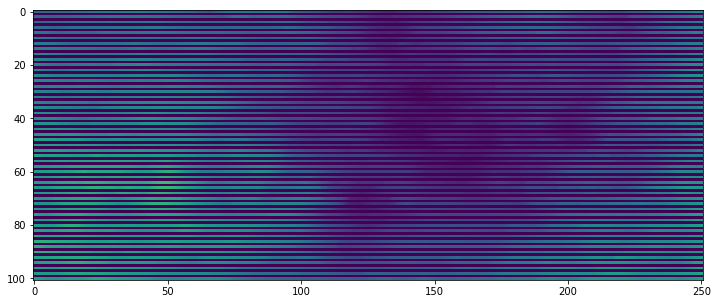

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)
print(horizon)
print(horizon[:, 0])

In [15]:
import scipy
points = []
wanted = []
for i in range(horizon.shape[0]):
    for j in range(horizon.shape[1]):
        if horizon[i, j] != 0.:
            points.append([i, j, horizon[i, j]])
        else:
            wanted.append([i, j])
points = np.array(points)
print(points.shape)

(12801, 3)


In [16]:
zs2 = scipy.interpolate.griddata(points[:, 0:2], points[:, 2], wanted, method="cubic")

In [17]:
for p, val in zip(wanted, zs2):
    horizon[p[0], p[1]] = val

[[2084.9        2084.6        2085.7        ... 2105.3
  2108.         2109.3       ]
 [2086.37158018 2086.27147345 2086.08614269 ... 2101.86904826
  2104.44339042 2106.54949533]
 [2087.1        2086.9        2086.3        ... 2100.
  2102.7        2105.3       ]
 ...
 [2122.2        2122.7        2124.         ... 2126.2
  2128.         2129.8       ]
 [2122.64947412 2123.46063439 2124.22731056 ... 2124.6713925
  2126.40205112 2128.82987939]
 [2124.         2125.3        2125.3        ... 2122.3
  2124.         2127.1       ]]
[2084.9        2086.37158018 2087.1        2086.32844458 2085.7
 2087.10897015 2089.9        2093.17316108 2096.3        2098.73189301
 2100.1        2100.30325939 2100.         2100.13029655 2101.8
 2105.01553768 2107.7        2108.36734239 2107.7        2106.93437322
 2106.8        2107.66338424 2109.5        2111.92827042 2113.3
 2112.30735347 2110.5        2109.48038392 2108.8        2107.89554267
 2107.2        2107.43026044 2108.         2108.35207526 2109

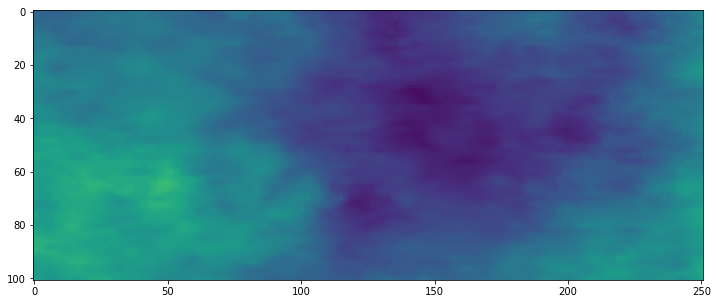

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)
print(horizon)
print(horizon[:, 0])
np.save("horizon.npy", horizon)

In [19]:
N = 38
M = 0
hrz_idx = [np.abs(twt-val).argmin() for val in horizon[N, :]]
print(hrz_idx)

[153, 153, 154, 154, 153, 153, 153, 152, 152, 152, 151, 151, 151, 151, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 151, 151, 151, 151, 151, 151, 151, 151, 151, 152, 152, 152, 152, 153, 153, 153, 154, 154, 154, 155, 155, 155, 155, 155, 154, 154, 154, 153, 153, 153, 153, 153, 152, 152, 152, 152, 151, 151, 151, 151, 151, 150, 150, 150, 149, 149, 148, 148, 148, 147, 147, 146, 146, 146, 145, 145, 145, 145, 145, 145, 145, 144, 144, 143, 143, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 141, 141, 141, 141, 141, 140, 140, 140, 140, 140, 140, 140, 139, 139, 139, 138, 138, 138, 137, 137, 137, 137, 137, 137, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 138, 138, 139, 139, 139, 140, 140, 140, 140, 139, 139, 139, 139, 139, 139, 139, 140, 140, 140, 141, 141, 141, 141, 141, 141, 140, 140, 139, 139, 139, 139, 139,

(62, 0)

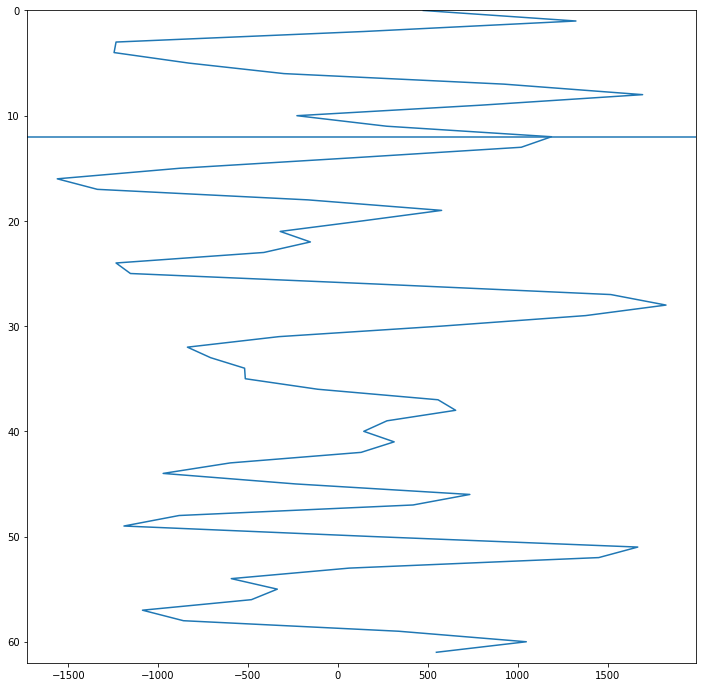

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
top_add, below_add = 12, 50
amplitude = near[hrz_idx[M]-top_add:hrz_idx[M]+below_add, N, M]
ax.plot(amplitude, range(len(amplitude)))
ax.axhline(top_add)
ax.set_ylim(below_add+top_add, 0)

(250, 251)
(250, 101, 251)


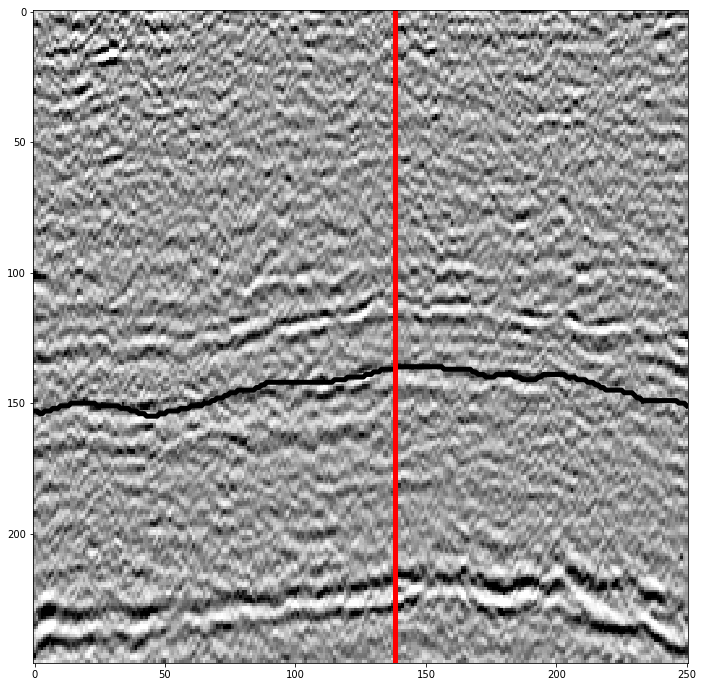

In [21]:
h_bin = np.zeros((250, near[:, N].shape[1]))
print(h_bin.shape)
for i, val in enumerate(hrz_idx):
    h_bin[val, i] = 1
print(near.shape)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
clip = abs(np.percentile(seis, 0.8))
ax.imshow(near[:, N], cmap="Greys", vmin=-clip, vmax=clip)
#ax.imshow(h_bin, alpha=0.2)
ax.plot(range(len(hrz_idx)), hrz_idx, linewidth=5, color="black")
ax.axvline(276//2, color="red", linewidth=5)

In [22]:
top_add, below_add = 12, 52
traces = np.zeros((horizon.shape[0], horizon.shape[1], top_add+below_add))
for i in range(horizon.shape[0]):
    hrz_idx = [np.abs(twt-val).argmin() for val in horizon[i, :]]
    for j in range(horizon.shape[1]):
        amplitude = near[hrz_idx[j]-top_add:hrz_idx[j]+below_add, i, j]
        traces[i, j, :] = amplitude

In [23]:
print(traces.shape)

(101, 251, 64)


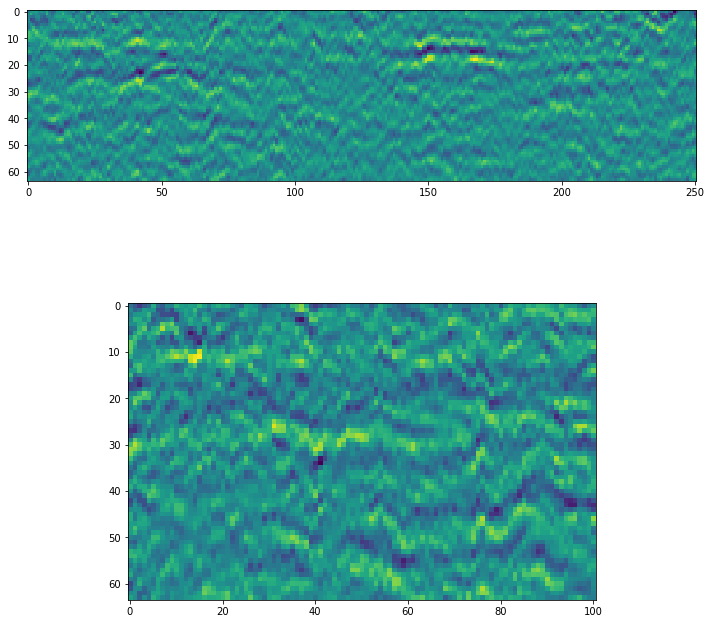

In [24]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 12))
axarr[0].imshow(traces[0].T)
axarr[1].imshow(traces[:, 0].T)

In [25]:
np.save("far_traces_64.npy", traces)

In [233]:
well_i, well_x = 36, 276//2
print(well_i, well_x)
block = []

near[:, well_i, well_x]

36 138


array([ 4497.,  1535., -2538., -3065.,  -737.,  1031.,  1061.,   482.,
         536.,  1178.,   703., -1889., -3937., -1624.,  3513.,  4923.,
         465., -3857., -2541.,  1780.,  2966.,    60., -2746., -2339.,
         481.,  2783.,  2561.,   217., -1655., -1401.,  -962., -1750.,
       -1531.,  1123.,  3274.,  2212.,   -22.,  -940., -1497., -2283.,
       -1487.,   783.,  1816.,  1604.,  2161.,  1884., -1692., -5037.,
       -2779.,  2827.,  4574.,   829., -3255., -3441.,  -356.,  2619.,
        2535.,   -80., -1383.,   357.,  1898.,   499., -1445., -1125.,
        -279., -1049., -1548.,   160.,  2070.,  1640.,   -39.,  -369.,
         521.,   505., -1131., -2522., -1550.,  1098.,  2633.,  1699.,
        -239., -1338., -1306.,  -601.,   489.,  1468.,  1547.,   549.,
        -757., -1632., -1863., -1349.,   -13.,  1695.,  2465.,  1202.,
       -1187., -2380., -1548.,   -68.,  1090.,  2137.,  2298.,   506.,
       -1581., -1375.,    63.,  -144., -1050.,   388.,  2888.,  2069.,
      

NameError: name 'x_avo' is not defined